In [72]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

import wandb

In [73]:
plt.rcParams.update({
    'axes.labelsize': 15,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'legend.title_fontsize': 15,
    'legend.fontsize': 15,
})

In [74]:
wandb.login()

True

In [75]:
api = wandb.Api()
project = 'seanxx/11711-hw4-ablation'
runs = api.runs(project)

In [76]:
results = []
for run in tqdm(runs):
    if 'pre' in run.tags:
        continue

    config = run.config
    summary = run.summary

    result = {}
    result['id'] = run.id
    result['embedding_path'] = config.get('embedding_path', None)
    result['test_roc_auc'] = summary.get('test_roc_auc', None)
    result['test_pr_auc'] = summary.get('test_pr_auc', None)

    results.append(result)

df = pd.DataFrame(results)
df

100%|██████████| 45/45 [00:00<00:00, 44420.73it/s]


,id,embedding_path,test_roc_auc,test_pr_auc
0,2xolxt98,embeddings/icd2embedding.pkl,0.701144,0.740610
1,vjyekhzh,embeddings/icd2embedding.pkl,0.707695,0.751325
2,ukb9y84o,embeddings/Bio_ClinicalBERT_sentence2embedding...,0.632297,0.682577
3,hr0mo15f,embeddings/Bio_ClinicalBERT_sentence2embedding...,0.629821,0.679815
4,n3os4rwn,embeddings/icd2embedding.pkl,0.701622,0.739252
5,vgnjbae2,embeddings/icd2embedding.pkl,0.698680,0.741078
6,dxv3rb1o,embeddings/icd2embedding.pkl,0.699645,0.738816
7,eqo7pgm3,embeddings/Bio_ClinicalBERT_sentence2embedding...,0.636358,0.686731
8,pa4i8kx9,embeddings/icd2embedding.pkl,0.705070,0.741387
9,mgm3v8r1,embeddings/icd2embedding.pkl,0.703136,0.741615


In [77]:
hue_col = 'Protocol Embedding Model'
df[hue_col] = df['embedding_path'].apply(
    lambda x: 'text-embedding-3-large' if 'icd2embedding' in x else 'ClinicalBERT')

In [78]:
figsize = (6, 4)

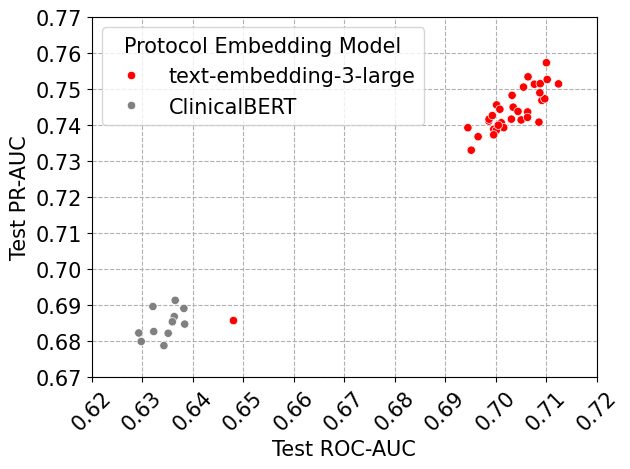

In [79]:
# plt.figure(figsize=figsize)

sns.scatterplot(data=df, x='test_roc_auc', y='test_pr_auc', hue=hue_col,
                palette=['red', "gray"])

# plt.title('Scatter Plot of Ablation Experiment Performance', fontsize=title_size)
plt.xlabel('Test ROC-AUC')
plt.ylabel('Test PR-AUC')
plt.legend(loc='upper left', title=hue_col)
plt.xticks(np.linspace(0.62, 0.72, 11), rotation=45)
plt.yticks(np.linspace(0.67, 0.77, 11), rotation=0)
plt.grid(True, linestyle='--')
plt.gca().set_axisbelow(True)

plt.tight_layout()
plt.savefig('scatter_plot.png', dpi=300)
plt.show()

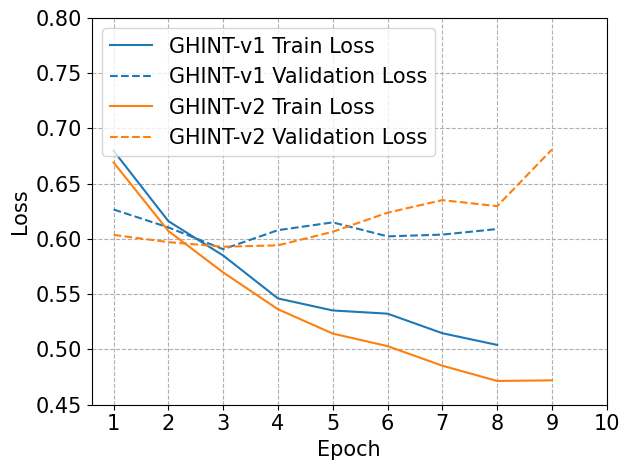

In [80]:
# plt.figure(figsize=figsize)

best_model_ids = ['36ce4x0h', 'kiz7ll7x']
model_name = ['GHINT-v1', 'GHINT-v2']
colors = ['tab:blue', 'tab:orange']

for i, model_id in enumerate(best_model_ids):
    run = api.run(os.path.join(project, model_id))
    hist_df = run.history().iloc[:-1, :]
    hist_df['Epoch'] = hist_df['_step'] + 1
    plt.plot(hist_df['Epoch'], hist_df['train_loss'],
             label=f'{model_name[i]} Train Loss', color=colors[i])
    plt.plot(hist_df['Epoch'], hist_df['val_loss'], linestyle='dashed',
             label=f'{model_name[i]} Validation Loss', color=colors[i])

# plt.title('Loss Curves of 2 Best Models', fontsize=title_size)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1, 11, 1))
plt.ylim(0.45, 0.8)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--')
plt.gca().set_axisbelow(True)

plt.tight_layout()
plt.savefig('loss_plot.png', dpi=300)
plt.show()

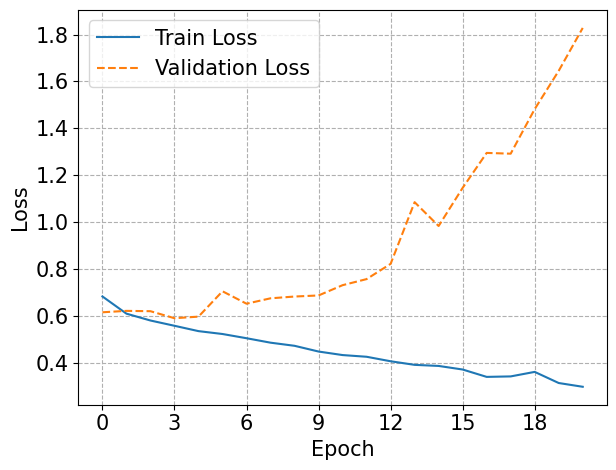

In [81]:
run = api.run(os.path.join(project, 'yl0e58ws'))
hist_df = run.history().iloc[:-1, :]
hist_df = hist_df[['train_loss', 'val_loss']].dropna().reset_index()
hist_df = hist_df.loc[:20, :]
plt.plot(hist_df.index, hist_df['train_loss'],
         label=f'Train Loss')
plt.plot(hist_df.index, hist_df['val_loss'], linestyle='dashed',
         label=f'Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(0, 20, 3))
plt.legend()
plt.grid(True, linestyle='--')
plt.gca().set_axisbelow(True)

plt.tight_layout()
plt.savefig('first_run.png', dpi=300)
plt.show()